# Lab 7.3: Introduction to Logistic Regression

In [9]:
import numpy as np
%pylab inline
import seaborn as sns
import yaml
from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

Populating the interactive namespace from numpy and matplotlib


In [20]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

**Question 1**

1) Write a Python function that computes the value of the logistic function.  

2) Define an array of values from -6 to 6 (using `numpy.linspace`), use the logistic function to obtain the probabilites, and plot the values (x) against the probabilities (y).
  

#### 1.1 python function
* The logistic function is defined to be

$$ f(t) = \frac{e^t}{1 + e^t} = \frac{exp(t)}{1 + exp(t)} = \frac{1}{1 + e^{-t}} $$

In [4]:
def logit(t):
    return np.exp(t) / (1+np.exp(t))

#### 1.2

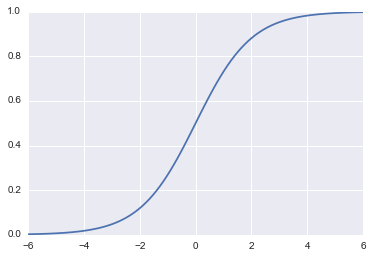

In [16]:
x = np.linspace(-6, 6, 100)
y = logit(x)
plot(x, y);

**Question 2**

You are given a data set with a binary response (`Shot`) in the `flu` table. The response of 1 represents people who have taken flu shots, 0 represents people who have not. `Age` represents the the age of the person and `Health_aware` is a score of how health aware the person is.


1) As usual, make plots to explore your data. By inspecting the scatter matrix, guess if people who are more health aware would be more likely to have got flu shots and if people who are old would be more likely to have got flu shots.


2) Why would it be inappropriate to use linear regression for this problem ?

   
3) Fit the data to a logistic regression model. Logistic regression is fitted in a similar manner in Python as linear regression, except the function we use is `Logit`.
  
 
4) Do the regression coefficients confirm your guesses in Part 1)? Why or why not?   

5) How would you interpret the regression coefficients? (removed from lab)

In [12]:
flu = pd.read_sql("SELECT * FROM flu;", engine)

In [13]:
flu.head()

,patient_id,Shot,Age,Health_aware
0,0,0.0,38.0,40.0
1,1,1.0,52.0,60.0
2,2,0.0,41.0,36.0
3,3,1.0,46.0,59.0
4,4,1.0,41.0,70.0


#### 2.1

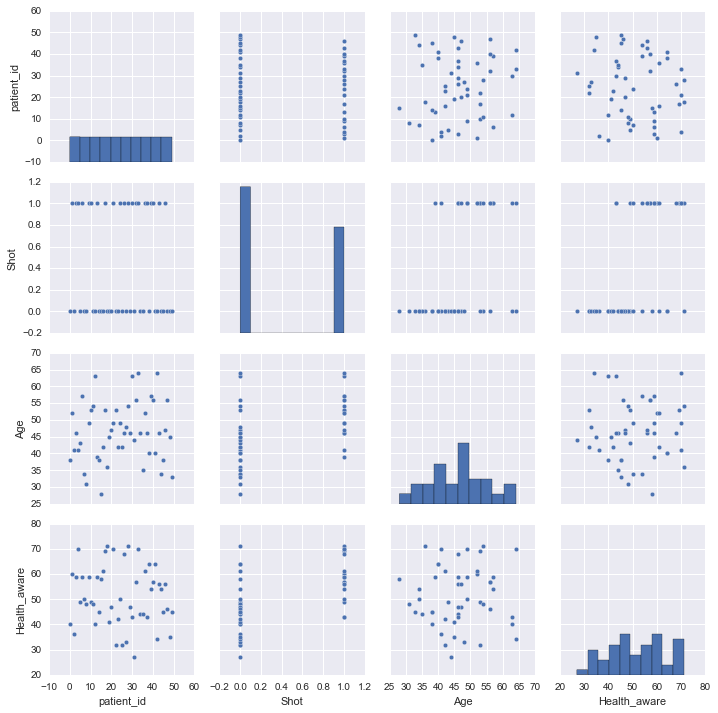

In [29]:
sns.pairplot(flu);

#### 2.1 commentary

it seems that both age and health awareness are positively correlated with getting flu shots.

#### 2.2

it would be inappropriate because there are only two possible answers for getting a shot: yes or no. This means that we have a logistic relationship, not a linear one. The graphs also indicate that, and a linear model wouldn't accurately describe the phenomenon.

#### 2.3

In [28]:
flu_model1 = smf.logit("Shot ~ Age + Health_aware", data=flu).fit()
flu_model1.summary()

Optimization terminated successfully.
         Current function value: 0.324163
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Shot   No. Observations:                   50
Model:                          Logit   Df Residuals:                       47
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Oct 2016   Pseudo R-squ.:                  0.5235
Time:                        15:06:36   Log-Likelihood:                -16.208
converged:                       True   LL-Null:                       -34.015
                                        LLR p-value:                 1.848e-08
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -21.5846      6.418     -3.363      0.001     -34.164      -9.005
Age              0.2218      0.074      2.983      0.003       0.076       0.368
Health_aware     0.2035      0.063      3.244      0.001       0.081       0.326
================================================================================
"""

#### $$ y = -21.58 + 0.2218 \times (Age) + 0.2035 \times Health Aware $$  


#### 2.4
Yes they do confirm our guess becuase both coefficients are positive. In other words, both increases in age and health awareness have positive effects on likelihood to get a shot.

**Question 3**  

The data set https://s3-us-west-2.amazonaws.com/dsci/6002/data/lrb.csv has data on 61 married couples. The dependent variable is HAPPYMAR, respondent’s marital happiness (1 = Very Happy, 0 = Otherwise). CHURCH, Church attendance (1 = Often attends, 0 = other), FEMALE (1 = female, 0 = male), and EDUC, Years of education, are the explanatory variables.  

1) Run the logistic regression of happymar on church, female and educ.  

2) Are all three explanatory variables needed in the model?  

3) Based on the signs of the logistic regression coefficients (positive or negative), interpret their impact on the probability of a happy marriage. Any surprises?  

4) Determine the probability of marital happiness for: (a) a male with 8 years of education who is not a regular churchgoer (b) a male with 8 years of education who is a regular churchgoer (c) a female with 16 years of education who is not a regular churchgoer (d) a female with 16 years of education who is a regular churchgoer. 

In [30]:
married = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/lrb.csv')
married.head()

,happymar,church,female,educ
0,0,0,0,9
1,1,0,1,10
2,1,1,1,16
3,1,1,1,11
4,1,1,1,12


In [31]:
married_model = smf.logit("happymar ~ church + female + educ", data=married).fit()
married_model.summary()

Optimization terminated successfully.
         Current function value: 0.403833
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               happymar   No. Observations:                   61
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            3
Date:                Thu, 13 Oct 2016   Pseudo R-squ.:                  0.3823
Time:                        15:22:10   Log-Likelihood:                -24.634
converged:                       True   LL-Null:                       -39.881
                                        LLR p-value:                 1.086e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.1586      3.285     -2.483      0.013     -14.598      -1.719
church         2.9075      0.921      3.158      0.002       1.103       4.712
female         2.3945      0.877      2.729      0.006       0.675       4.114
educ           0.5267      0.265      1.986      0.047       0.007       1.046
==============================================================================
"""

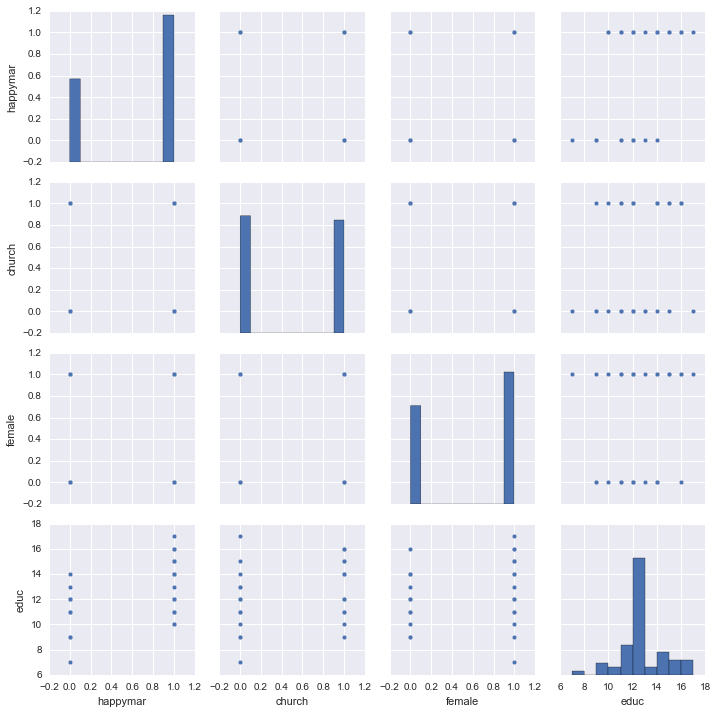

In [33]:
sns.pairplot(married);

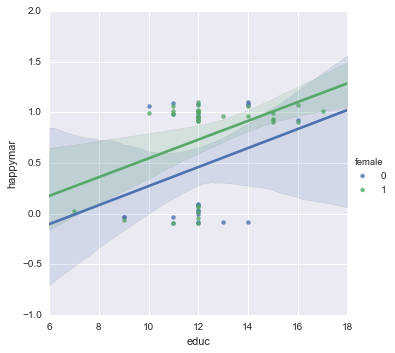

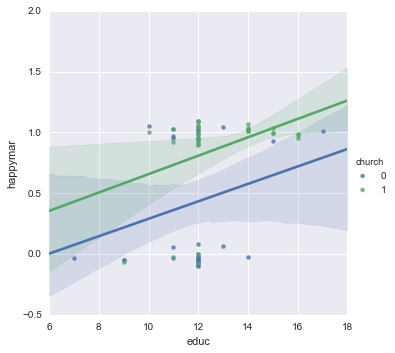

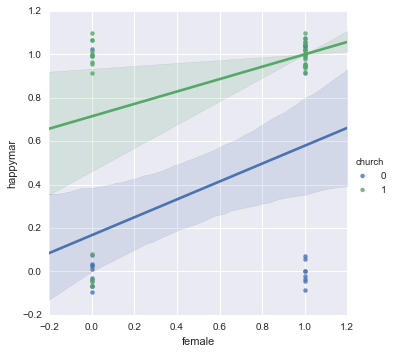

In [58]:
sns.lmplot("educ", "happymar", married, hue="female", size=5, y_jitter=.1)
sns.lmplot("educ", "happymar", married, hue="church", size=5, y_jitter=.1)
sns.lmplot("female", "happymar", married, hue="church", size=5, y_jitter=.1);

#### 3.2 commentary

It doesn't seem that education has a strong role in predicting the model results-- it's p-value is just under .05, whereas church and gender (female) are much strong predictors with p-values of  .002 and .006 respectively. However, when you analyze the lmplots, all of the variables seem to be strong explainers of the model.

#### 3.3

according to the signs of the coefficients, it appears that both church and female would have positive effects on the likelihood of being in a happy marriage. The sign of the educ variable is also positive, which is not surprising.

#### 3.4
+ (a) a male with 8 years of education who is not a regular churchgoer 
+ (b) a male with 8 years of education who is a regular churchgoer 
+ (c) a female with 16 years of education who is not a regular churchgoer 
+ (d) a female with 16 years of education who is a regular churchgoer.

$ y = -8.16 + 2.91 \times (Church) + 2.39 \times (Female) + 0.53 \times (educ) $ 


In [41]:
a = -8.16 + 2.91*0 + 2.39*0 + 0.53*8
print("probability of a male with 8 years of education who is not a regular \nchurchgoer being happily married is: ",
      round(logit(a), 4)*100, "percent.")

probability of a male with 8 years of education who is not a regular 
churchgoer being happily married is:  1.95 percent.


In [67]:
b = -8.16 + 2.91*1 + 2.39*0 + 0.53*8
print("probability of a male with 8 years of education who is a regular \nchurchgoer being happily married is: ",
      round(logit(b), 4)*100, "percent.")

probability of a male with 8 years of education who is a regular 
churchgoer being happily married is:  26.7 percent.


In [44]:
c = -8.16 + 2.91*0 + 2.39*1 + 0.53*16
print("probability of a female with 16 years of education who is not a regular \nchurchgoer being happily married is: ",
      round(logit(c), 4)*100, "percent.")

probability of a female with 16 years of education who is not a regular 
churchgoer being happily married is:  93.76 percent.


In [59]:
d = -8.16 + 2.91*1 + 2.39*1 + 0.53*16
print("probability of a female with 16 years of education who is a regular \nchurchgoer being happily married is: ",
      round(logit(d), 4)*100, "percent.")

probability of a female with 16 years of education who is a regular 
churchgoer being happily married is:  99.64 percent.
